In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

df = pd.read_csv('Desafio Indicium IMDB.csv') # dataset a partir do upload no armazenamento da sessão

print(df.head())

   Unnamed: 0                                   Series_Title Released_Year  \
0           1                                  The Godfather          1972   
1           2                                The Dark Knight          2008   
2           3                         The Godfather: Part II          1974   
3           4                                   12 Angry Men          1957   
4           5  The Lord of the Rings: The Return of the King          2003   

  Certificate  Runtime                     Genre  IMDB_Rating  \
0           A  175 min              Crime, Drama          9.2   
1          UA  152 min      Action, Crime, Drama          9.0   
2           A  202 min              Crime, Drama          9.0   
3           U   96 min              Crime, Drama          9.0   
4           U  201 min  Action, Adventure, Drama          8.9   

                                            Overview  Meta_score  \
0  An organized crime dynasty's aging patriarch t...       100.0   
1  W

In [2]:
# Converti "Runtime' para número, removendo 'min'. 'Gross' para número removendo as vírgulas,
# também preenchi valores nulos para não dar erro.
df['Runtime'] = df['Runtime'].str.replace(' min', '').astype(int)
df['Gross'] = df['Gross'].fillna('0')
df['Gross'] = df['Gross'].str.replace(',', '').astype(float)
df['Meta_score'] = df['Meta_score'].fillna('0').astype(float)

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     999 non-null    int64  
 1   Series_Title   999 non-null    object 
 2   Released_Year  999 non-null    object 
 3   Certificate    898 non-null    object 
 4   Runtime        999 non-null    int64  
 5   Genre          999 non-null    object 
 6   IMDB_Rating    999 non-null    float64
 7   Overview       999 non-null    object 
 8   Meta_score     999 non-null    float64
 9   Director       999 non-null    object 
 10  Star1          999 non-null    object 
 11  Star2          999 non-null    object 
 12  Star3          999 non-null    object 
 13  Star4          999 non-null    object 
 14  No_of_Votes    999 non-null    int64  
 15  Gross          999 non-null    float64
dtypes: float64(3), int64(3), object(10)
memory usage: 125.0+ KB
None


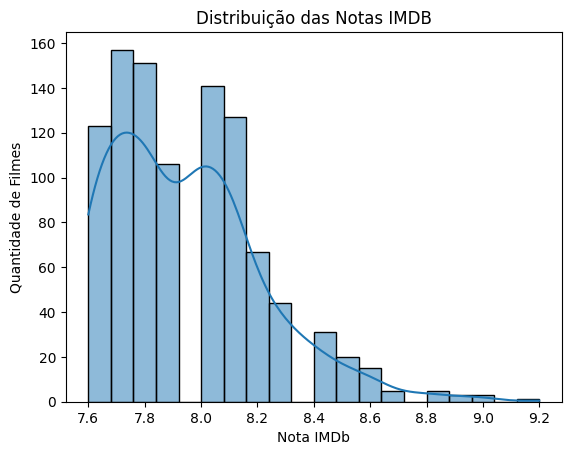

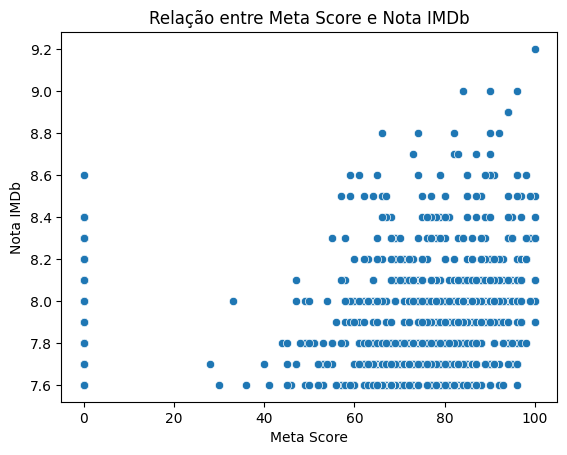

In [3]:
sns.histplot(df['IMDB_Rating'], kde=True, bins=20) # distribuição das Notas do IMDB
plt.title('Distribuição das Notas IMDB')
plt.xlabel('Nota IMDb')
plt.ylabel('Quantidade de Filmes')
plt.show() # a maioria dos filmes tem notas altas,acima de 7.5

sns.scatterplot(x='Meta_score', y='IMDB_Rating', data=df) # relação entre a nota do MetaScore e a nota do IMDB
plt.title('Relação entre Meta Score e Nota IMDb')
plt.xlabel('Meta Score')
plt.ylabel('Nota IMDb')
plt.show() # filmes com boas avaliações Meta_score tendem a ter boas avaliações do público IMDB.



In [4]:
# 2-
# a) Qual filme você recomendaria para uma pessoa que você não conhece?

df_melhor = df.sort_values(by='IMDB_Rating', ascending=False)
print(df_melhor[['Series_Title', 'IMDB_Rating']].head(1)) # Eu recomendaria o filme com a maior nota


# b) Quais são os principais fatores que estão relacionados com alta expectativa de faturamento de um filme?

#     A principal fator está relacionado ao número de votos, quanto maior o número de votos, naturalmente será maior o faturamento


# c) Quais insights podem ser tirados com a coluna Overview? É possível inferir o gênero do filme a partir dessa coluna?

#     É possível usá-la para extrair palavras chave e entender melhor o gênero de cada filme.
#     Como "war", "battle" e "soldier" podem indicar filmes de guerra,
#     e "love", "romance" e "relationship" podem indicar filmes românticos.

    Series_Title  IMDB_Rating
0  The Godfather          9.2


In [5]:
# 3- A previsão da nota IMDb foi feita como um problema de regressão, já que a nota é um número contínuo.

# Escolhi as variáveis Meta_score, No_of_Votes e Runtime, que apresentaram relação com a avaliação do público
# Utilizei o modelo Regressão Linear por ser mai fácil de interpretar e suficiente para esses dados.
# A performance foi medida com EAM (Erro Absoluto Médio) e REQM (Raiz do Erro Quadrático Médio), que mostraram erros baixos (MAE ≈ 0.19 e RMSE ≈ 0.23), indicando boa precisão.”

X = df[['Meta_score', 'No_of_Votes', 'Runtime']]  # variáveis de entrada
y = df['IMDB_Rating'] # variável alvo

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # treino e teste

modelo = LinearRegression()
modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test) # previsões

eam = mean_absolute_error(y_test, y_pred) # Erro Absoluto Médio.
reqm = np.sqrt(mean_squared_error(y_test, y_pred)) # Raiz do Erro Quadrático Médio.

print(f"EAM: {eam:.2f}")
print(f"REQM: {reqm:.2f}")

EAM: 0.19
REQM: 0.23


In [6]:
# 4 - nota do IMDB do filme de exemplo
ex_filme = {
    'Series_Title': 'The Shawshank Redemption',
    'Released_Year': 1994,
    'Certificate': 'A',
    'Runtime': 142,
    'Genre': 'Drama',
    'Overview': 'Two imprisoned men bond over a number of years...',
    'Meta_score': 80.0,
    'Director': 'Frank Darabont',
    'Star1': 'Tim Robbins',
    'Star2': 'Morgan Freeman',
    'Star3': 'Bob Gunton',
    'Star4': 'William Sadler',
    'No_of_Votes': 2343110,
    'Gross': 28341469
}

ex_filme_df = pd.DataFrame([ex_filme])[['Meta_score', 'No_of_Votes', 'Runtime']]

previsao_nota = modelo.predict(ex_filme_df)[0] # pega o primeiro (e único) resultado da previsão
print(f"A nota prevista do IMDb para esse filme é: {previsao_nota:.2f}")

A nota prevista do IMDb para esse filme é: 8.86


In [7]:
# 5-

joblib.dump(modelo, 'imdb_rating_model.pkl')

print("Modelo salvo com sucesso como 'imdb_rating_model.pkl'")

Modelo salvo com sucesso como 'imdb_rating_model.pkl'
